In [6]:
import bs4
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import requests

# general init function

In [15]:
# source can be changed dynamically so that all currencies can be called with the same script using a function or a lass
# start and end can also be adjusted dynamically for future scrapes

def scrape_hist(currency):
    source=requests.get(f"https://coinmarketcap.com/currencies/{currency}/historical-data/?start=20130428&end=20191002").text
    page_soup=soup(source,"lxml")
    scraped_page=page_soup.find_all("tr",{"class":"text-right"})
    return scraped_page

In [19]:
decred = scrape_hist("decred")

In [20]:
filename="firstscrape.csv"
f=open(filename,"w")
headers="Date,Open,High,Low,Close,Volume,Market_Cap\n"
f.write(headers)

43

In [21]:
%who

bs4	 decred	 f	 filename	 headers	 requests	 scrape_his	 scrape_hist	 soup	 
uReq	 


In [24]:
# needs to parse the varibles to remove commas

for i in range(len(decred)):
    date = decred[i].td.text
    price_list = decred[i].find_all("td")
    price = price_list[1].text
    high = price_list[2].text
    low = price_list[3].text
    close = price_list[4].text
    volume = price_list[5].text
    market_cap = price_list[6].text
    row=date.replace(","," ")+","+price.replace(","," ") + ","+high.replace(","," ")+","+low.replace(","," ")+","+close.replace(","," ")+","+volume.replace(","," ")+","+market_cap.replace(","," ")+"\n" 
    f.write(row)
f.close()

In [6]:
source=requests.get("https://coinmarketcap.com/currencies/aidcoin/historical-data/?start=20130428&end=20191002").text
page_soup=soup(source,"lxml")
AidCoin=page_soup.find_all("tr",{"class":"text-right"})

In [7]:
filename="firstscrape.csv"
f=open(filename,"w")
headers="Date,Price\n"
f.write(headers)

11

In [8]:
for i in range(len(AidCoin)):
    date=AidCoin[i].td.text
    price_list = AidCoin[i].find_all("td")
    price=price_list[1].text
    row=date.replace(","," ")+","+price + "\n" 
    f.write(row)
f.close()

In [25]:
import pandas as pd
df = pd.read_csv('firstscrape.csv')

In [26]:
df.head()

,Date,Open,High,Low,Close,Volume,Market_Cap
0,Oct 02 2019,17.46,17.65,17.04,17.26,7 517 874,180 781 776
1,Oct 01 2019,17.46,17.92,17.25,17.46,7 240 253,182 788 420
2,Sep 30 2019,17.67,17.72,16.36,17.45,8 593 531,182 607 653
3,Sep 29 2019,18.01,18.43,17.31,17.67,7 439 542,184 785 280
4,Sep 28 2019,17.57,18.09,17.48,18.02,7 732 269,188 332 327


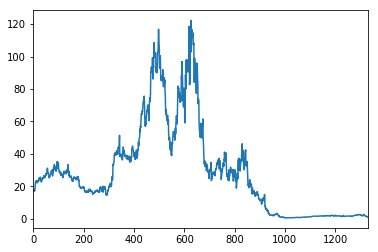

In [28]:
df['Open'].plot();